In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
divar_df = pd.read_csv('../datasets/Divar.csv')

/tmp/ipykernel_2491/1278108169.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  divar_df = pd.read_csv('../datasets/Divar.csv')


In [3]:
divar_df['cat2_slug'].unique()

array(['temporary-rent', 'residential-sell', 'residential-rent',
       'commercial-rent', 'commercial-sell', 'real-estate-services'],
      dtype=object)

In [3]:
divar_df = divar_df[(divar_df['cat2_slug'] != 'real-estate-services') & (divar_df['cat2_slug'] != 'temporary-rent')]

### building_size

In [10]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['building_size']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

apartment-sell :  0 303385
apartment-rent :  0 211880
office-rent :  0 21418
shop-sell :  0 21855
plot-old :  0 133570
house-villa-sell :  0 121753
house-villa-rent :  0 64678
shop-rent :  0 45993
industry-agriculture-business-rent :  0 9155
office-sell :  0 5155
industry-agriculture-business-sell :  0 11851
nan :  0 0


In [11]:
for cat3 in divar_df['cat3_slug'].unique() :
    mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['building_size'].to_numpy()))
    divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['building_size'].isna()), 'building_size'] = mean

/tmp/ipykernel_2491/3681495114.py:2: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['building_size'].to_numpy()))


### floor

In [12]:
divar_df['floor'] = divar_df['floor'].apply(lambda x: np.float64(30) if x == '30+' else np.float64(x))

In [13]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['floor']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

apartment-sell :  0 303385
apartment-rent :  0 211880
office-rent :  0 21418
shop-sell :  0 21855
plot-old :  0 133570
house-villa-sell :  0 121753
house-villa-rent :  0 64678
shop-rent :  0 45993
industry-agriculture-business-rent :  0 9155
office-sell :  0 5155
industry-agriculture-business-sell :  0 11851
nan :  0 0


In [14]:
for cat3 in divar_df['cat3_slug'].unique() :
    if divar_df[divar_df['cat3_slug'] == cat3]['floor'].isnull().sum() > 100 :
        divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['floor'].isna()), 'floor'] = 0
    else :
        mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['floor'].to_numpy()))
        divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['floor'].isna()), 'floor'] = mean

/tmp/ipykernel_2491/2803813171.py:5: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['floor'].to_numpy()))


In [15]:
divar_df['floor'].isnull().sum()

np.int64(1)

### rooms_count

In [16]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['rooms_count']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

apartment-sell :  6 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  11 21855
plot-old :  133569 133570
house-villa-sell :  15 121753
house-villa-rent :  11 64678
shop-rent :  30 45993
industry-agriculture-business-rent :  382 9155
office-sell :  0 5155
industry-agriculture-business-sell :  581 11851
nan :  0 0


In [17]:
def rooms_counts_convertor(rooms_count) :
    if rooms_count == 'یک' :
        return 1
    elif rooms_count == 'دو' :
        return 2
    elif rooms_count == 'سه' :
        return 3
    elif rooms_count == 'چهار' :
        return 4
    elif rooms_count == 'پنج یا بیشتر' :
        return 5
    elif rooms_count == 'بدون اتاق' :
        return 0
    
divar_df['rooms_count'] = divar_df['rooms_count'].apply(lambda x: rooms_counts_convertor(x))

In [18]:
for cat3 in divar_df['cat3_slug'].unique() :
    if cat3 == 'plot-old' :
        divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['rooms_count'].isna()), 'rooms_count'] = 0
    else :
        mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['rooms_count'].to_numpy()))
        divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['rooms_count'].isna()), 'rooms_count'] = mean

/tmp/ipykernel_2491/622566082.py:5: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['rooms_count'].to_numpy()))


### final_price

In [19]:
divar_df['final_price'] = np.where(divar_df['price_value'].notna(), divar_df['price_value'],
    np.where((divar_df['transformable_credit'].notna()) | (divar_df['transformable_rent'].notna()),
        ((divar_df['transformable_credit'].fillna(0) * 30000) / 1000000) + divar_df['transformable_rent'].fillna(0), np.nan)
            )

### construction_year

In [20]:
persian_to_english = str.maketrans("۰۱۲۳۴۵۶۷۸۹", "0123456789")
def convert(x):
    if 'قبل' in str(x):
        return 1369
    elif not pd.notna(x) : return x
    return int(str(x).translate(persian_to_english))

divar_df['construction_year'] = divar_df['construction_year'].apply(convert)

In [21]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['construction_year']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

apartment-sell :  5 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  11 21855
plot-old :  133569 133570
house-villa-sell :  15 121753
house-villa-rent :  11 64678
shop-rent :  30 45993
industry-agriculture-business-rent :  478 9155
office-sell :  0 5155
industry-agriculture-business-sell :  663 11851
nan :  0 0


In [22]:
divar_df['cat2_slug'].unique()

array(['residential-sell', 'residential-rent', 'commercial-rent',
       'commercial-sell'], dtype=object)

In [23]:
divar_df.loc[divar_df['cat3_slug'] == 'plot-old', 'construction_year'] = 1370

In [24]:
for cat3 in divar_df['cat3_slug'].unique() :
    mean = np.round(np.nanmean(
        divar_df[(divar_df['cat3_slug'] == cat3)]['construction_year'].to_numpy()
    ))
    divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['construction_year'].isna()), 'construction_year'] = mean

/tmp/ipykernel_2491/4002084911.py:2: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(


### has_elevator

In [15]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['has_elevator']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

apartment-sell :  7 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  21855 21855
plot-old :  133570 133570
house-villa-sell :  121753 121753
house-villa-rent :  64678 64678
shop-rent :  45993 45993
industry-agriculture-business-rent :  9155 9155
office-sell :  0 5155
industry-agriculture-business-sell :  11850 11851
nan :  0 0


In [41]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['has_balcony']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

apartment-sell :  118552 303385
apartment-rent :  92914 211880
office-rent :  21418 21418
shop-sell :  21855 21855
plot-old :  133569 133570
house-villa-sell :  6045 121753
house-villa-rent :  3235 64678
shop-rent :  45993 45993
industry-agriculture-business-rent :  9155 9155
office-sell :  5155 5155
industry-agriculture-business-sell :  11851 11851
nan :  0 0


In [43]:
for cat3 in divar_df['cat3_slug'].unique() :
    mean = divar_df[(divar_df['cat3_slug'] == cat3) & (divar_df['has_elevator'].isna())]['building_size'].mean()
    print(f'{cat3} : ' , mean)

apartment-sell :  387.85714285714283
apartment-rent :  781.0
office-rent :  2043.0
shop-sell :  1922.259208419126
plot-old :  10931.158269072397
house-villa-sell :  2543.3232692418255
house-villa-rent :  4675.252852592845
shop-rent :  2234.4919009414475
industry-agriculture-business-rent :  61111.255379574
office-sell :  nan
industry-agriculture-business-sell :  70535.57333333333
nan :  nan


In [44]:
for cat3 in divar_df['cat3_slug'].unique() :
    mean = divar_df[(divar_df['cat3_slug'] == cat3) & (divar_df['has_elevator'] == False)]['building_size'].mean()
    print(f'{cat3} : ' , mean)

apartment-sell :  648.0784669341084
apartment-rent :  1182.981805500439
office-rent :  3973.4364802520536
shop-sell :  nan
plot-old :  nan
house-villa-sell :  nan
house-villa-rent :  nan
shop-rent :  nan
industry-agriculture-business-rent :  nan
office-sell :  365.69029275808936
industry-agriculture-business-sell :  485.0
nan :  nan


In [45]:
for cat3 in divar_df['cat3_slug'].unique() :
    mean = divar_df[(divar_df['cat3_slug'] == cat3) & (divar_df['has_elevator'] == True)]['building_size'].mean()
    print(f'{cat3} : ' , mean)

apartment-sell :  442.66907595856804
apartment-rent :  521.3722865356227
office-rent :  666.6797207286735
shop-sell :  nan
plot-old :  nan
house-villa-sell :  nan
house-villa-rent :  nan
shop-rent :  nan
industry-agriculture-business-rent :  nan
office-sell :  253.58465128338088
industry-agriculture-business-sell :  nan
nan :  nan


In [48]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[(divar_df['cat3_slug'] == cat3)]['has_elevator']
    print(cat3, df.value_counts())

apartment-sell has_elevator
True     220120
False     83258
Name: count, dtype: int64
apartment-rent has_elevator
True     128710
False     83157
Name: count, dtype: int64
office-rent has_elevator
True     12461
False     8887
Name: count, dtype: int64
shop-sell Series([], Name: count, dtype: int64)
plot-old Series([], Name: count, dtype: int64)
house-villa-sell Series([], Name: count, dtype: int64)
house-villa-rent Series([], Name: count, dtype: int64)
shop-rent Series([], Name: count, dtype: int64)
industry-agriculture-business-rent Series([], Name: count, dtype: int64)
office-sell has_elevator
True     3857
False    1298
Name: count, dtype: int64
industry-agriculture-business-sell has_elevator
False    1
Name: count, dtype: int64
nan Series([], Name: count, dtype: int64)


### warehouse

In [25]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['has_warehouse']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

apartment-sell :  7 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  21855 21855
plot-old :  133569 133570
house-villa-sell :  15 121753
house-villa-rent :  11 64678
shop-rent :  45993 45993
industry-agriculture-business-rent :  9155 9155
office-sell :  0 5155
industry-agriculture-business-sell :  11850 11851
nan :  0 0


In [26]:
divar_df.loc[divar_df['cat3_slug'] == 'plot-old', 'has_warehouse'] = False

In [27]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['has_warehouse']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

apartment-sell :  7 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  21855 21855
plot-old :  0 133570
house-villa-sell :  15 121753
house-villa-rent :  11 64678
shop-rent :  45993 45993
industry-agriculture-business-rent :  9155 9155
office-sell :  0 5155
industry-agriculture-business-sell :  11850 11851
nan :  0 0


<Axes: xlabel='building_size', ylabel='Count'>

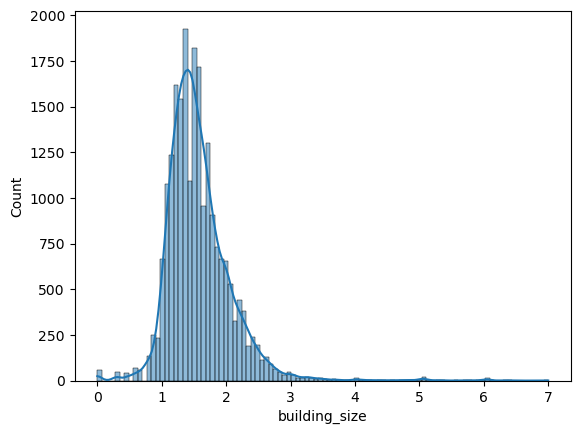

In [28]:
test = divar_df[divar_df['cat3_slug'] == 'shop-sell']['building_size']
sns.histplot(np.log10(test), bins=100, kde=True)


/home/roham/.miniconda3/envs/test/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='final_price', ylabel='Count'>

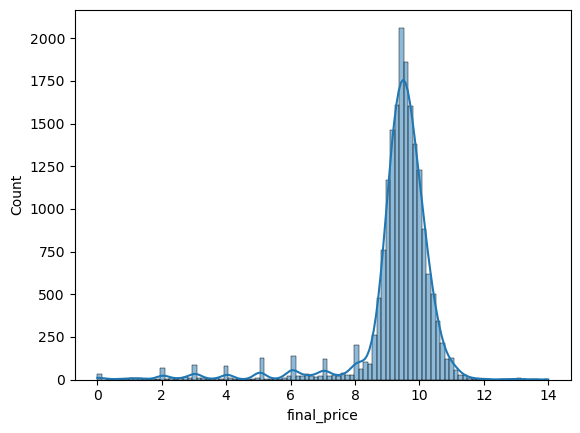

In [29]:
test = divar_df[divar_df['cat3_slug'] == 'shop-sell']['final_price']
sns.histplot(np.log10(test), bins=100, kde=True)

In [30]:
for col in ['shop-sell', 'shop-rent'] :
    quantile = divar_df[divar_df['cat3_slug'] == col]['building_size'].quantile(0.75)
    divar_df.loc[(divar_df['cat3_slug'] == col) & (divar_df['building_size'] > quantile) & (divar_df['has_warehouse'].isna()), 'has_warehouse'] = True
    divar_df.loc[(divar_df['cat3_slug'] == col) & (divar_df['has_warehouse'].isna()), 'has_warehouse'] = False


In [31]:
for col in ['industry-agriculture-business-rent', 'industry-agriculture-business-sell'] :
    divar_df.loc[(divar_df['cat3_slug'] == col), 'has_warehouse'] = True

In [32]:
for i, col in enumerate(divar_df['cat3_slug'].unique()) :
    if i == 11: break
    has_warehouse = divar_df[divar_df['cat3_slug'] == col]['has_warehouse'].value_counts().reset_index()['has_warehouse'][0]
    divar_df.loc[(divar_df['cat3_slug'] == col) & (divar_df['has_warehouse'].isna()), 'has_warehouse'] = has_warehouse

### has_parking

In [33]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['has_parking']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

apartment-sell :  6 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  21855 21855
plot-old :  133569 133570
house-villa-sell :  15 121753
house-villa-rent :  11 64678
shop-rent :  45993 45993
industry-agriculture-business-rent :  9155 9155
office-sell :  0 5155
industry-agriculture-business-sell :  11850 11851
nan :  0 0


In [34]:
for col in divar_df['cat3_slug'].unique() :
    divar_df.loc[(divar_df['cat3_slug'] == col) & (divar_df['has_parking'].isna()), 'has_parking'] = False

### is_rebuilt

In [31]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['is_rebuilt']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

apartment-sell :  78535 303385
apartment-rent :  54797 211880
office-rent :  21418 21418
shop-sell :  21855 21855
plot-old :  133569 133570
house-villa-sell :  29897 121753
house-villa-rent :  8998 64678
shop-rent :  45993 45993
industry-agriculture-business-rent :  9155 9155
office-sell :  5155 5155
industry-agriculture-business-sell :  11851 11851
nan :  0 0


In [33]:
divar_df['is_rebuilt'].value_counts()

is_rebuilt
False    353191
True     176279
Name: count, dtype: int64

### final_price

In [35]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['final_price']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

apartment-sell :  5 303385
apartment-rent :  280 211880
office-rent :  186 21418
shop-sell :  3296 21855
plot-old :  23734 133570
house-villa-sell :  5 121753
house-villa-rent :  133 64678
shop-rent :  166 45993
industry-agriculture-business-rent :  110 9155
office-sell :  675 5155
industry-agriculture-business-sell :  2763 11851
nan :  0 0


In [36]:
for cat2 in divar_df['cat2_slug'].unique() :
    df = divar_df[divar_df['cat2_slug'] == cat2]['final_price']
    print(f'{cat2} : ' , df.isnull().sum(), len(df))

residential-sell :  23744 558708
residential-rent :  413 276558
commercial-rent :  462 76567
commercial-sell :  6734 38861


In [37]:
for construction_year in divar_df['construction_year'].unique() :
    df = divar_df[divar_df['construction_year'] == construction_year]['final_price']
    print(f'{construction_year} : ' , df.isnull().sum(), len(df))

1384.0 :  57 8494
1401.0 :  299 35328
1400.0 :  577 53674
1403.0 :  1138 116259
1389.0 :  82 16755
1395.0 :  353 53034
1393.0 :  286 29209
1396.0 :  225 35487
1387.0 :  76 14136
1385.0 :  242 34065
1370.0 :  23734 133570
1390.0 :  452 59161
1398.0 :  288 38207
1402.0 :  424 58424
1388.0 :  118 24268
1369.0 :  838 20637
1392.0 :  402 26793
1383.0 :  60 9894
1394.0 :  230 26601
1391.0 :  87 16316
1380.0 :  293 23480
1378.0 :  37 3025
1375.0 :  112 7247
1397.0 :  235 36326
1399.0 :  211 29594
1382.0 :  59 6965
1386.0 :  109 13468
1379.0 :  34 2415
1372.0 :  34 1914
1374.0 :  26 1289
1376.0 :  19 1593
1377.0 :  34 2117
1371.0 :  112 5531
1381.0 :  37 3590
1373.0 :  33 1827
nan :  0 0


In [38]:
divar_df = divar_df[~divar_df['final_price'].isna()]

### colmns

In [72]:
columns = ['building_size', 'floor', 'rooms_count', 'construction_year', 'final_price', 'has_warehouse', 'has_parking', 'cat2_slug', 'location_latitude', 'location_longitude']

In [73]:
df = divar_df[columns].copy()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919341 entries, 1 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   building_size      919341 non-null  float64
 1   floor              919340 non-null  float64
 2   rooms_count        919340 non-null  float64
 3   construction_year  919340 non-null  float64
 4   final_price        919341 non-null  float64
 5   has_warehouse      919340 non-null  object 
 6   has_parking        919340 non-null  object 
 7   cat2_slug          919341 non-null  object 
dtypes: float64(5), object(3)
memory usage: 63.1+ MB


### encode

In [74]:
df = pd.get_dummies(df, columns=['cat2_slug'])

In [75]:
df = df.dropna()

### model

In [76]:
df['final_price_log'] = np.log1p(df['final_price'])

In [77]:
Q1 = df['final_price_log'].quantile(0.25)
Q3 = df['final_price_log'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_clean = df[(df['final_price_log'] >= lower) & (df['final_price_log'] <= upper)]

In [41]:
df_clean.columns

Index(['building_size', 'floor', 'rooms_count', 'construction_year',
       'final_price', 'has_warehouse', 'has_parking',
       'cat2_slug_commercial-rent', 'cat2_slug_commercial-sell',
       'cat2_slug_residential-rent', 'cat2_slug_residential-sell',
       'final_price_log'],
      dtype='object')

In [78]:
from sklearn.preprocessing import RobustScaler

num_cols = [
    'building_size', 'floor', 'rooms_count', 'construction_year','final_price_log'
]

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_clean[num_cols])

# تبدیل به دیتافریم
df_scaled = pd.DataFrame(scaled_data, columns=num_cols, index=df_clean.index)

df_final = pd.concat([df_scaled, df_clean[['has_warehouse', 'has_parking', 'cat2_slug_commercial-rent', 'cat2_slug_commercial-sell', 'cat2_slug_residential-rent', 'cat2_slug_residential-sell']]], axis=1)

In [79]:
for col in ['has_warehouse', 'has_parking', 'cat2_slug_commercial-rent', 'cat2_slug_commercial-sell', 'cat2_slug_residential-rent', 'cat2_slug_residential-sell'] :
    df_final.loc[df_final[col] == True, col] = 1
    df_final.loc[df_final[col] == False, col] = 0

/tmp/ipykernel_2491/3183889583.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_final.loc[df_final[col] == True, col] = 1
/tmp/ipykernel_2491/3183889583.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_final.loc[df_final[col] == True, col] = 1
/tmp/ipykernel_2491/3183889583.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_final.loc[df_final[col] == True, col] = 1
/tmp/ipykernel_2491/3183889583.py:2: FutureWarning: Setting an item of incompatible dtype is d

In [81]:
df_final

,building_size,floor,rooms_count,construction_year,final_price_log,has_warehouse,has_parking,cat2_slug_commercial-rent,cat2_slug_commercial-sell,cat2_slug_residential-rent,cat2_slug_residential-sell
2,0.415584,0.666667,1.0,0.466667,-0.613840,1,1,0,0,1,0
7,0.000000,1.000000,0.0,-0.066667,0.378997,1,1,0,0,0,1
8,-0.285714,1.000000,0.0,0.133333,-0.117297,1,1,0,0,0,1
10,-0.168831,1.000000,0.0,0.600000,0.147924,1,1,0,0,0,1
11,-0.116883,0.000000,0.0,-0.600000,-0.670861,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
999991,-0.116883,1.000000,0.0,-0.400000,0.210182,1,1,0,0,0,1
999993,-0.649351,0.000000,-1.0,-0.533333,-0.998340,0,1,0,0,1,0
999995,1.038961,1.000000,2.0,0.600000,0.349835,1,1,0,0,0,1
999996,0.129870,0.000000,0.0,0.600000,-0.530441,1,1,0,0,1,0


In [82]:
from sklearn.cluster import KMeans

num_cols = df_final.columns

X = df_final[num_cols]

# اجرای KMeans با 10 خوشه
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
df_final['cluster'] = kmeans.fit_predict(X)

# مراکز خوشه‌ها
centroids = kmeans.cluster_centers_

print("centroids:")
print(pd.DataFrame(centroids, columns=num_cols))

centroids:
   building_size     floor  rooms_count  construction_year  final_price_log  \
0       2.416130  0.221003    -0.363126          -0.208664        -0.224771   
1  128462.828505  0.051282    -0.615385          -0.203419        -0.346971   
2   37313.393939 -0.287037    -0.638889          -0.179630        -0.196747   
3   14334.778817 -0.219344    -0.829016          -0.294991        -0.308567   
4   66255.313853 -0.333333    -0.833333          -0.544444         0.201300   
5    1709.049358 -0.179189    -0.787120          -0.373286        -0.310234   
6   25446.834632  0.066667    -0.933333          -0.515556         0.082245   
7   86378.766234 -0.333333    -1.571429          -1.095238        -0.052601   
8    6913.797422 -0.285354    -0.765152          -0.384343        -0.135463   
9   54553.936064 -0.256410    -0.846154          -0.625641        -0.485517   

   has_warehouse  has_parking  cat2_slug_commercial-rent  \
0       0.675364     0.597837                   0.083953   

In [65]:
from sklearn.metrics import silhouette_score

# نمونه‌برداری
sample_idx = np.random.choice(len(X), size=200000, replace=False)

# تبدیل X به array (اگر DataFrame است)
X_sample = X.iloc[sample_idx].values  # تبدیل به numpy array
cluster_sample = df_final['cluster'].iloc[sample_idx].values

score = silhouette_score(X_sample, cluster_sample)
print("Silhouette Score (sampled):", score)

Silhouette Score (sampled): 0.9941735526298366


In [86]:
df_final

,building_size,floor,rooms_count,construction_year,final_price_log,has_warehouse,has_parking,cat2_slug_commercial-rent,cat2_slug_commercial-sell,cat2_slug_residential-rent,cat2_slug_residential-sell,cluster
2,0.415584,0.666667,1.0,0.466667,-0.613840,1,1,0,0,1,0,0
7,0.000000,1.000000,0.0,-0.066667,0.378997,1,1,0,0,0,1,0
8,-0.285714,1.000000,0.0,0.133333,-0.117297,1,1,0,0,0,1,0
10,-0.168831,1.000000,0.0,0.600000,0.147924,1,1,0,0,0,1,0
11,-0.116883,0.000000,0.0,-0.600000,-0.670861,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
999991,-0.116883,1.000000,0.0,-0.400000,0.210182,1,1,0,0,0,1,0
999993,-0.649351,0.000000,-1.0,-0.533333,-0.998340,0,1,0,0,1,0,0
999995,1.038961,1.000000,2.0,0.600000,0.349835,1,1,0,0,0,1,0
999996,0.129870,0.000000,0.0,0.600000,-0.530441,1,1,0,0,1,0,0


In [ ]:
pd.concat([df_final, df[['location_latitude', 'location_longitude']]], axis=1)

,building_size,floor,rooms_count,construction_year,final_price_log,has_warehouse,has_parking,cat2_slug_commercial-rent,cat2_slug_commercial-sell,cat2_slug_residential-rent,cat2_slug_residential-sell,cluster,location_latitude,location_longitude
2,0.415584,0.666667,1.0,0.466667,-0.613840,1,1,0,0,1,0,0.0,35.703865,51.373459
7,0.000000,1.000000,0.0,-0.066667,0.378997,1,1,0,0,0,1,0.0,35.729832,51.505466
8,-0.285714,1.000000,0.0,0.133333,-0.117297,1,1,0,0,0,1,0.0,35.712364,50.794781
10,-0.168831,1.000000,0.0,0.600000,0.147924,1,1,0,0,0,1,0.0,35.778664,51.757549
11,-0.116883,0.000000,0.0,-0.600000,-0.670861,1,1,0,0,1,0,0.0,35.733952,51.380608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
import matplotlib.pyplot as plt
from pyproj import Transformer

# فقط رکوردهایی که مختصات دارن
coords = df_clean[['location_latitude', 'location_longitude', 'final_price_log', 'cluster']].dropna()

# تبدیل مختصات به UTM (اینجا Zone 39N فرض شده، اگر منطقه‌ی داده‌ها فرق داره باید Zone اصلاح بشه)
transformer = Transformer.from_crs("epsg:4326", "epsg:32639", always_xy=True)

coords['UTM_E'], coords['UTM_N'] = transformer.transform(
    coords['location_longitude'].values,
    coords['location_latitude'].values
)

# مراکز خوشه‌ها هم به UTM تبدیل کنیم
centroids = kmeans.cluster_centers_   # از مدل KMeans قبلی
centroids_df = pd.DataFrame(centroids, columns=num_cols)

# برای نمایش مراکز روی نقشه، لازم داریم مختصات مرکز خوشه‌ها در UTM
# چون ما latitude/longitude رو از فیچرها حذف کردیم، اینجا فقط قیمته → پس برای نمایش ساده‌تر فقط X=final_price_log و Y=neighborhood_encoded رو نمی‌خوایم
# پس مراکز جغرافیایی رو از داده‌ی اصلی محاسبه می‌کنیم
centroids_geo = coords.groupby('cluster')[['UTM_E','UTM_N']].mean().reset_index()

# رسم نمودار
plt.figure(figsize=(12, 8))
scatter = plt.scatter(coords['UTM_E'], coords['UTM_N'],
                      c=coords['cluster'], cmap='tab10', alpha=0.5, s=10, label="Properties")

# رسم مراکز خوشه‌ها
plt.scatter(centroids_geo['UTM_E'], centroids_geo['UTM_N'],
            c=centroids_geo['cluster'], cmap='tab10', 
            marker='X', s=200, edgecolor='black', linewidth=1.5, label="Cluster Centers")

# عنوان و برچسب محور
plt.xlabel("UTM Easting (m)")
plt.ylabel("UTM Northing (m)")
plt.title("K-means Clustering of Properties (UTM Coordinates)")

# legend و colorbar
plt.legend()
plt.show()

KeyError: "['location_latitude', 'location_longitude'] not in index"